In [1]:
# Paso 1: Análisis exploratorio de datos
#cargar librerias
import pandas as pd #
import numpy as np #
import seaborn as sns #
import matplotlib.pyplot as plt #

#libresisas para implementae modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression #libreria para regresion lineal
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
#lectura de datos
datos_titanic = pd.read_csv('./Titanic-Dataset.csv')

In [3]:
# Mostrar las primeras filas del dataset titanic
print(datos_titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
# Información general del dataset titanic
print(datos_titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
# Resumen estadístico del dataset titanic
print(datos_titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [6]:
# Paso 2: Preprocesamiento de los datos

# Reemplazar valores infinitos con NaN 
datos_titanic.replace([np.inf, -np.inf], np.nan, inplace=True)

In [7]:
# Tratamiento de valores faltantes
datos_titanic['Age'].fillna(datos_titanic['Age'].median(), inplace=True)
datos_titanic['Embarked'].fillna(datos_titanic['Embarked'].mode()[0], inplace=True)
# Eliminar columnas no necesarias
datos_titanic.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True)

In [8]:
# Convertir variables categóricas en numéricas
datos_titanic = pd.get_dummies(datos_titanic, columns=['Sex', 'Embarked'], drop_first=True)

In [9]:
# Mostrar las primeras filas del dataset preprocesado
print(datos_titanic.head())

   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


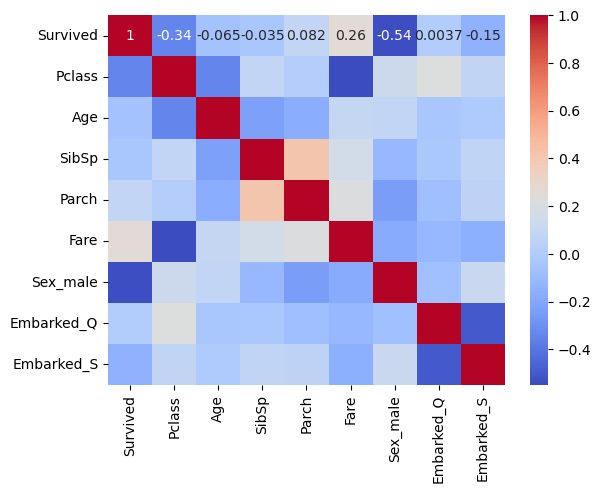

In [10]:
# Análisis de correlaciones
correlation_matrix = datos_titanic .corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

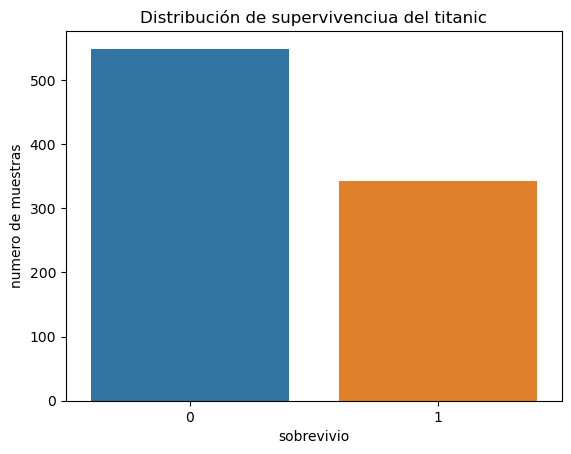

In [11]:
# Distribución de las variables
sns.countplot(data=datos_titanic, x='Survived')
plt.title('Distribución de supervivenciua del titanic')
plt.xlabel('sobrevivio')
plt.ylabel('numero de muestras')
plt.show()

C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


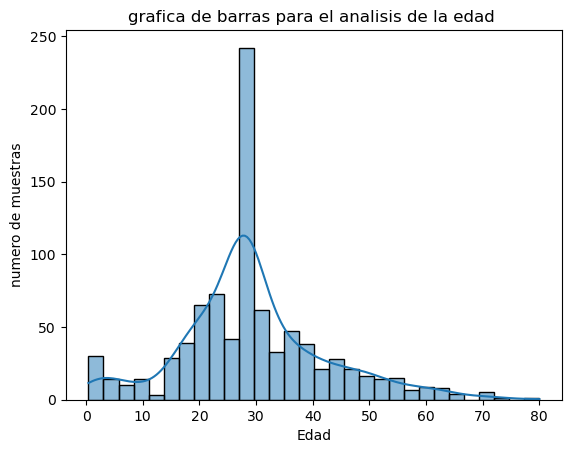

In [12]:
# se analiza graficamente la variable 'Age'
sns.histplot(data=datos_titanic, x='Age', kde=True)
plt.title('grafica de barras para el analisis de la edad ')
plt.xlabel('Edad')
plt.ylabel('numero de muestras')
plt.show()

C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


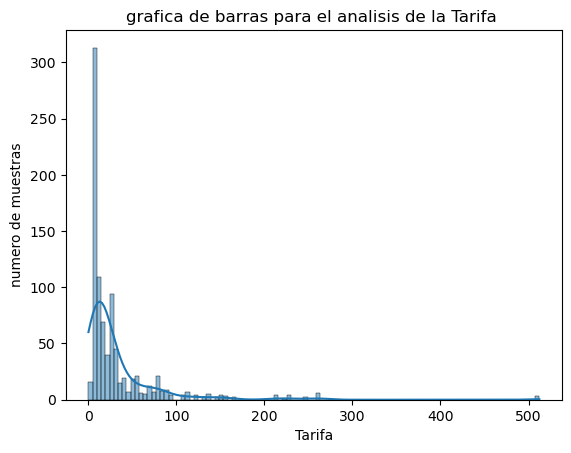

In [13]:
# se analiza graficamente la variable 'Fare'
sns.histplot(data=datos_titanic, x='Fare', kde=True)
plt.title('grafica de barras para el analisis de la Tarifa ')
plt.xlabel('Tarifa')
plt.ylabel('numero de muestras')
plt.show()

In [14]:
# Convertir la columna 'Survived' a cadena de texto
datos_titanic['Survived'] = datos_titanic['Survived'].astype(str)

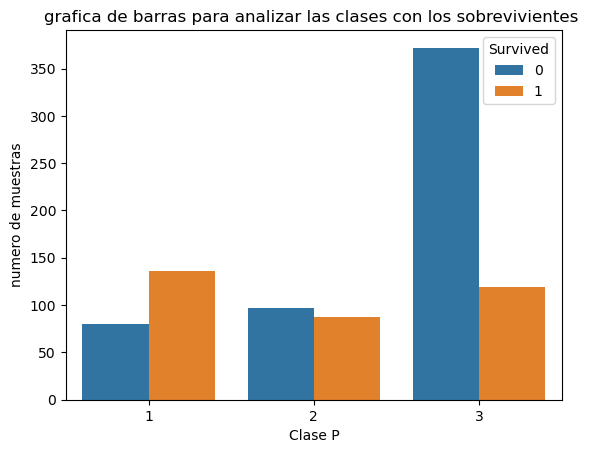

In [15]:
# analisamos la relacion entre estas dos columnas 'Pclass' y 'Survived'

sns.countplot(data=datos_titanic, x='Pclass', hue='Survived')
plt.title('grafica de barras para analizar las clases con los sobrevivientes ')
plt.xlabel('Clase P')
plt.ylabel('numero de muestras')
plt.show()

In [16]:
# Paso 3: Selección de características

# Seleccionar las características más relevantes
X = datos_titanic.drop(columns=['Survived'])
y = datos_titanic['Survived']

In [17]:
# Paso 4: División del dataset en Train y Test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Paso 5: Entrenamiento del modelo

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [19]:
# Definir el modelo
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
# Definir los hiperparámetros
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [21]:
# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=5, scoring='accuracy')

# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
mejor_modelo = grid_search.best_estimator_

In [22]:
# Paso 6: Evaluación del modelo

from sklearn.metrics import classification_report, confusion_matrix

# Predicciones en el conjunto de prueba
y_pred = mejor_modelo.predict(X_test)

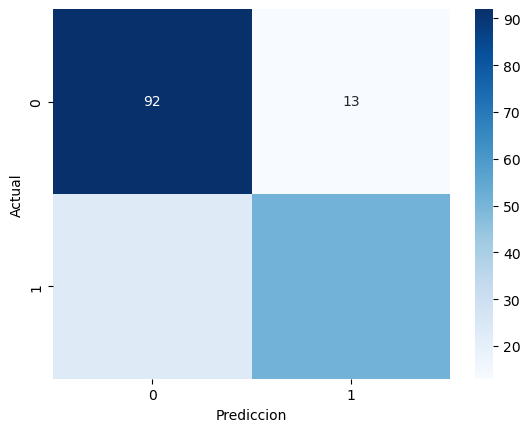

In [23]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediccion')
plt.ylabel('Actual')
plt.show()

In [24]:
# Informe de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [25]:

# Paso 7: Visualización de los resultados

# Importancia de las características
feature_importances = pd.DataFrame(mejor_modelo.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)


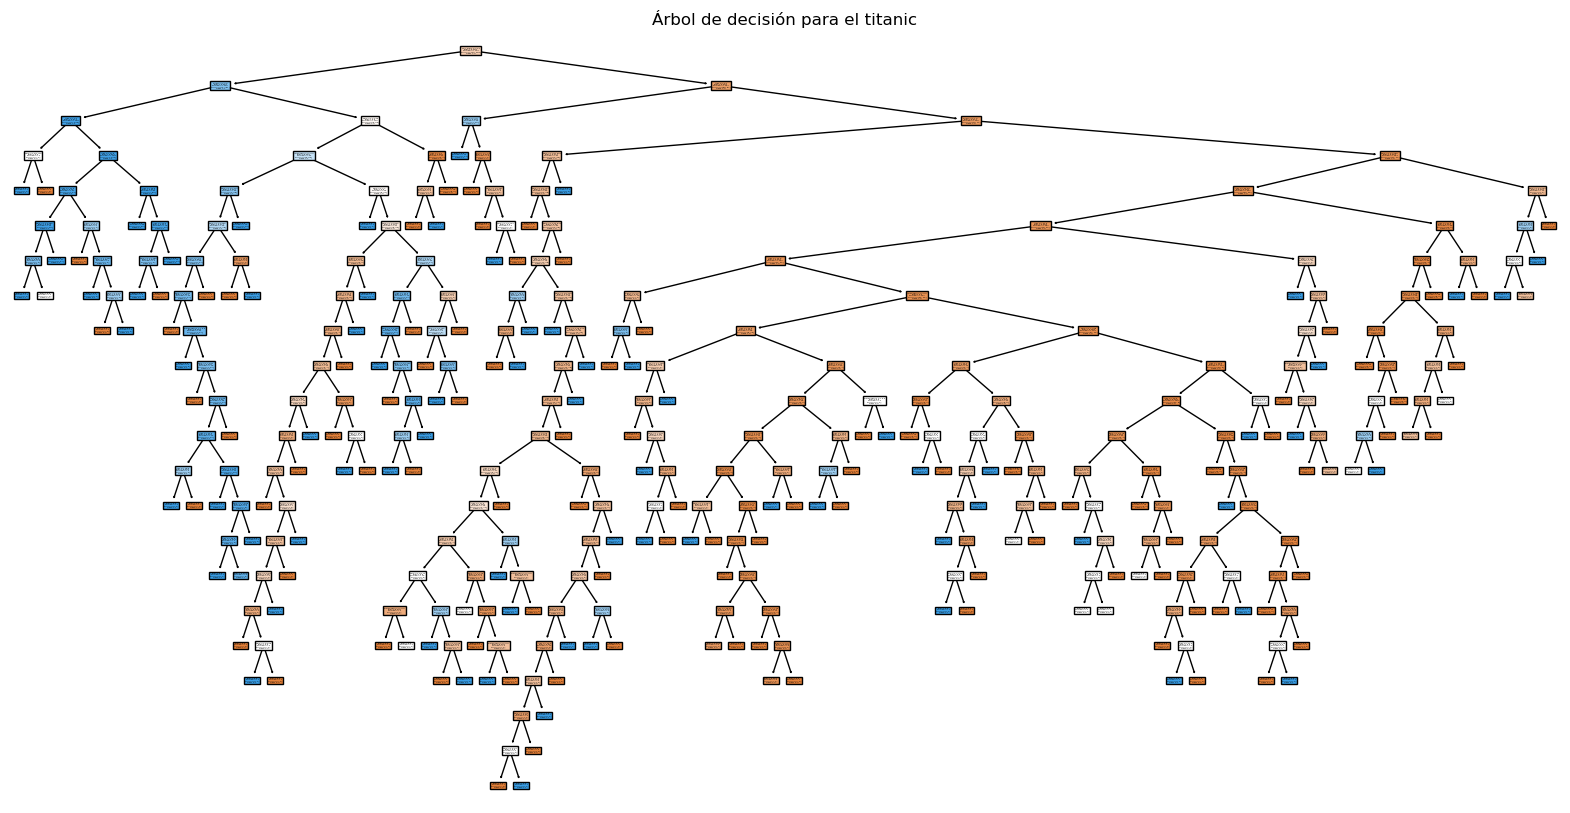

In [26]:
# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(modelo, feature_names=X.columns, class_names=np.unique(y).astype(str), filled=True)
plt.title('Árbol de decisión para el titanic')
plt.show()

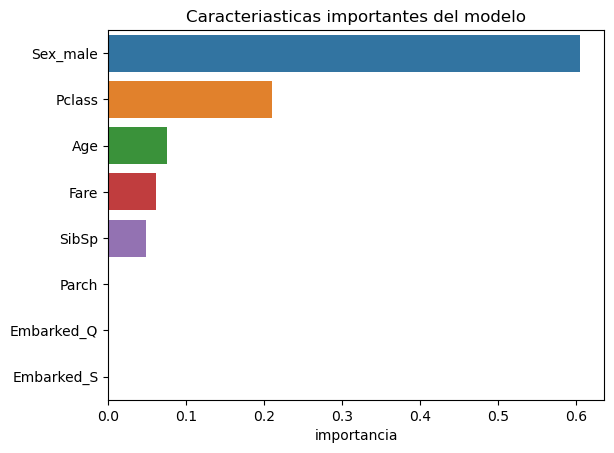

In [27]:
# Gráfica de importancia de las características
sns.barplot(x=feature_importances['importance'], y=feature_importances.index)
plt.title('Caracteriasticas importantes del modelo')
plt.xlabel('importancia')
plt.show()

In [28]:
# Paso 8: Interpretación y documentación de los resultados

print("Mejores hiperparámetros:", grid_search.best_params_)
print("Precisión en el conjunto de prueba:", mejor_modelo.score(X_test, y_test))

Mejores hiperparámetros: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Precisión en el conjunto de prueba: 0.7988826815642458
